# Podpunkt 2:
Wczytaj dane z biblioteki Keras, używając zbioru danych Fashion MNIST (from keras.datasets
import fashion_mnist), który zawiera 60 000 obrazów treningowych i 10 000 obrazów testowych, każdy w 28x28 pikselach w odcieniach szarości.

In [3]:
import tensorflow
import keras
from keras.datasets import cifar10
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sea
import pandas as pd
import numpy as np

In [4]:
# Wczytanie danych fashion mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# co jest w x_train
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
# zawartość y_train
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

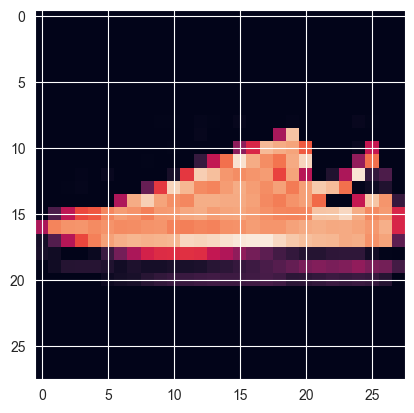

In [6]:
# Przykładowe zdjęcie z naszego zbioru treningowego
plt.imshow(x_train[6])

# Podpunkt 3:
Przygotuj dane do trenowania modelu poprzez normalizację wartości pikseli do zakresu od 0 do
1 oraz przekształcenie etykiet kategorii na postać one-hot encoding.

In [7]:
# Normalizacja danych
x_train = x_train / 255.0
x_test = x_test / 255.0

# Podpunkt 4
Zbuduj model sieci neuronowej w Keras, składający się z warstw konwolucyjnych, warstw poolingowych i warstw w pełni połączonych.

In [8]:
# Definicja modelu CNN
model = Sequential([
 Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 Flatten(),
 Dense(64, activation='relu'),
 Dense(10, activation='softmax')
])


# Kompilacja modelu
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

# Podpunkt 5 i 6
- Trenuj model na danych treningowych przez określoną liczbę epok (np. 10), określając także
  dane walidacyjne do monitorowania wydajności modelu podczas trenowania.
- Dokonaj oceny modelu poprzez ewaluacji jego wydajności na zbiorze testowym oraz wizualizację wyników

In [22]:
# Trenowanie modelu
model.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))

# Ocena modelu
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Dokładność klasyfikacji:', test_acc)

Epoch 1/6
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0754 - accuracy: 0.9717 - val_loss: 0.3885 - val_accuracy: 0.9027
Epoch 2/6
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0732 - accuracy: 0.9723 - val_loss: 0.4072 - val_accuracy: 0.9075
Epoch 3/6
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0678 - accuracy: 0.9737 - val_loss: 0.4365 - val_accuracy: 0.9059
Epoch 4/6
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0643 - accuracy: 0.9756 - val_loss: 0.4313 - val_accuracy: 0.9037
Epoch 5/6
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0616 - accuracy: 0.9766 - val_loss: 0.4550 - val_accuracy: 0.9009
Epoch 6/6
313/313 [==============================] - 2s 6ms/step - loss: 0.4661 - accuracy: 0.9045
Dokładność klasyfikacji: 0.9045000076293945


# Podpunkt 7
Przeprowadzić predykcje na nowych danych i dokładniej zbadać wyniki za pomocą macierzy
pomyłek oraz raportu klasyfikacji.

In [23]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [24]:
y_pred

array([[3.3693214e-13, 1.6270478e-14, 1.1500433e-18, ..., 1.3674405e-07,
        2.1515945e-14, 9.9999988e-01],
       [4.4690214e-14, 8.8205809e-18, 9.9999940e-01, ..., 5.7398317e-27,
        3.0603430e-13, 6.9628950e-26],
       [5.5208896e-36, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.6456043e-32, 0.0000000e+00, 1.0254679e-33, ..., 2.3642578e-34,
        1.0000000e+00, 0.0000000e+00],
       [2.6386035e-29, 1.0000000e+00, 5.0412502e-28, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.6202667e-15, 2.4838007e-23, 8.1334644e-12, ..., 6.5732544e-11,
        1.1621393e-12, 7.4675441e-16]], dtype=float32)

In [25]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

[792 976 854 894 880 977 768 960 979 965]


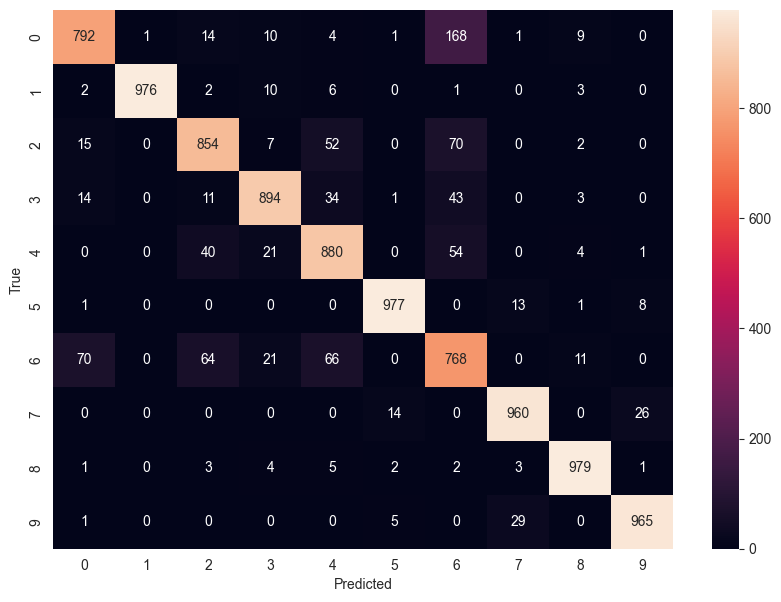

In [26]:
# Obliczenie confusion matrix

cm = confusion_matrix(y_test, y_pred)

print(cm.diagonal())

# Tworzenie DataFrame z confusion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(10)], columns = [i for i in range(10)])

# Tworzenie heatmapy confusion matrix
plt.figure(figsize = (10,7))
sea.heatmap(df_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [27]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.79      0.84      1000\n           1       1.00      0.98      0.99      1000\n           2       0.86      0.85      0.86      1000\n           3       0.92      0.89      0.91      1000\n           4       0.84      0.88      0.86      1000\n           5       0.98      0.98      0.98      1000\n           6       0.69      0.77      0.73      1000\n           7       0.95      0.96      0.96      1000\n           8       0.97      0.98      0.97      1000\n           9       0.96      0.96      0.96      1000\n\n    accuracy                           0.90     10000\n   macro avg       0.91      0.90      0.91     10000\nweighted avg       0.91      0.90      0.91     10000\n'

# Wnioski
Model który stworzyłem, sprawdzę się na poziomie klasyfikacji 0.9 co jest wynikiem zadowalającym dla mnie.
